In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd

In [2]:
import os
working_dir = os.getcwd()

# Processed rawdata

In [500]:
# df_rent = pd.read_csv("102S1-108S1_rentdata.csv")
# df_buy_old = pd.read_csv("102S1-108S1_buyolddata.csv")
# df_buy_new = pd.read_csv("102S1-108S1_buynewdata.csv")
# print(df_rent.shape, df_buy_old.shape, df_buy_new.shape)

In [448]:
def dist_trans_old(df_buy_old):
    df_buy_old=df_buy_old.sort_values('dist')

    i_list, d_list = [], []
    last = 'start'
    for i,index in enumerate(df_buy_old.index):
        d = df_buy_old.loc[index, 'dist']
        if d != last:
            i_list.append(i)
            d_list.append(d)
        last = d

    for i in range(len(i_list)):
        if i != len(i_list):
            d = d_list[i]
            if d == "松山區":
                df_buy_old.iloc[i_list[i]:i_list[i+1]]['dist'] = 'Songshan'
            elif d == "南港區":
                df_buy_old.iloc[i_list[i]:i_list[i+1]]['dist'] = 'Nangang'
            elif d == "大同區":
                df_buy_old.iloc[i_list[i]:i_list[i+1]][ 'dist'] = 'Datong'
            elif d == "信義區":
                df_buy_old.iloc[i_list[i]:i_list[i+1]]['dist'] = 'Xinyi'
            elif d == "大安區":
                df_buy_old.iloc[i_list[i]:i_list[i+1]][ 'dist']= 'Daan'
            elif d == "士林區":
                df_buy_old.iloc[i_list[i]:i_list[i+1]][ 'dist'] = 'Shilin'
            elif d == "萬華區":
                df_buy_old.iloc[i_list[i]:][ 'dist'] = 'Wanhua'
            elif d == "中正區":
                df_buy_old.iloc[i_list[i]:i_list[i+1]][ 'dist'] = 'Zhongzheng'
            elif d == "文山區":
                df_buy_old.iloc[i_list[i]:i_list[i+1]][ 'dist'] = 'Wenshan'
            elif d == "中山區":
                df_buy_old.iloc[i_list[i]:i_list[i+1]]['dist'] = 'Zhongshan'
            elif d == "內湖區":
                df_buy_old.iloc[i_list[i]:i_list[i+1]][ 'dist'] = 'Neihu'
            elif d == "北投區":
                df_buy_old.iloc[i_list[i]:i_list[i+1]][ 'dist'] = 'Beitou'
    return df_buy_old

In [499]:
def dist_trans(df):
    for i in df.index:
        d = df.loc[i, 'dist']
        if d == "松山區":
            df.loc[i, 'dist'] = 'Songshan'
        elif d == "南港區":
            df.loc[i, 'dist'] = 'Nangang'
        elif d == "大同區":
            df.loc[i, 'dist'] = 'Datong'
        elif d == "信義區":
            df.loc[i, 'dist'] = 'Xinyi'
        elif d == "大安區":
            df.loc[i, 'dist']= 'Daan'
        elif d == "士林區":
            df.loc[i, 'dist']= 'Shilin'
        elif d == "萬華區":
            df.loc[i, 'dist']= 'Wanhua'
        elif d == "中正區":
            df.loc[i, 'dist'] = 'Zhongzheng'
        elif d == "文山區":
            df.loc[i, 'dist'] = 'Wenshan'
        elif d == "中山區":
            df.loc[i, 'dist'] = 'Zhongshan'
        elif d == "內湖區":
            df.loc[i, 'dist'] = 'Neihu'
        elif d == "北投區":
            df.loc[i, 'dist'] = 'Beitou'
    return df

# rent

In [958]:
# df_rent = df_rent[[ '鄉鎮市區','單價元平方公尺', '土地區段位置建物區段門牌',
#        '建物型態', '建物總面積平方公尺', '租賃層次', '租賃年月日', '總樓層數',
#        '總額元', '車位總額元', '車位面積平方公尺', '車位類別',]]
# df_rent=df_rent.sort_values('租賃年月日')
# df_rent=df_rent[df_rent['租賃年月日']>1010101]
# df_rent.rename(columns={"租賃年月日":"rent_date",
#                 "鄉鎮市區":"dist", "土地區段位置建物區段門牌":"addr", "建物型態":"hourse_type",
#                 "單價元平方公尺":"price_per_square",   "建物總面積平方公尺":"room_size",   
#                 "租賃層次":"house_floor",   "總樓層數":"total_floor",   "總額元":"price", 
#                 "車位類別":"parking", "車位總額元":"parking_price", "車位面積平方公尺":"parking_square",
#                }, inplace=True)
# df_rent=dist_trans(df_rent)
# df_rent.head()

In [526]:
# df_rent.to_csv("102S1-108S1_rentdata_processed1.csv")

# buy

In [959]:
# df_buy_old = df_buy_old[[ '鄉鎮市區','單價元平方公尺', '土地區段位置建物區段門牌',
#        '建物型態', '建物移轉總面積平方公尺', '移轉層次', '交易年月日', '總樓層數',
#        '總價元', '車位總價元', '車位移轉總面積平方公尺', '車位類別',]]
# df_buy_old=df_buy_old.sort_values('交易年月日')
# df_buy_old=df_buy_old[df_buy_old['交易年月日']>1000101]
# df_buy_old.rename(columns={"交易年月日":"buy_date",
#                 "鄉鎮市區":"dist", "土地區段位置建物區段門牌":"addr", "建物型態":"hourse_type",
#                 "單價元平方公尺":"price_per_square",   "建物移轉總面積平方公尺":"room_size",   
#                 "移轉層次":"house_floor",   "總樓層數":"total_floor",   "總價元":"price", 
#                 "車位類別":"parking", "車位總價元":"parking_price", "車位移轉總面積平方公尺":"parking_square",
#                }, inplace=True)
# df_buy_old=dist_trans_old(df_buy_old)
# df_buy_old.head()

In [528]:
# df_buy_old.to_csv("102S1-108S1_buyolddata_processed1.csv")

In [960]:
# df_buy_new = df_buy_new[[ '鄉鎮市區','單價元平方公尺', '土地區段位置建物區段門牌',
#        '建物型態', '建物移轉總面積平方公尺', '移轉層次', '交易年月日', '總樓層數',
#        '總價元', '車位總價元', '車位移轉總面積平方公尺', '車位類別',]]
# df_buy_new=df_buy_new.sort_values('交易年月日')
# df_buy_new=df_buy_new[df_buy_new['交易年月日']>1000101]
# df_buy_new.rename(columns={"交易年月日":"buy_date",
#                 "鄉鎮市區":"dist", "土地區段位置建物區段門牌":"addr", "建物型態":"hourse_type",
#                 "單價元平方公尺":"price_per_square",   "建物移轉總面積平方公尺":"room_size",   
#                 "移轉層次":"house_floor",   "總樓層數":"total_floor",   "總價元":"price", 
#                 "車位類別":"parking", "車位總價元":"parking_price", "車位移轉總面積平方公尺":"parking_square",
#                }, inplace=True)
# df_buy_new=dist_trans(df_buy_new)
# df_buy_new

In [530]:
# df_buy_new.to_csv("102S1-108S1_buynewdata_processed1.csv")

## read

In [947]:
df_rent = pd.read_csv("102S1-108S1_rentdata_processed1.csv")
df_buy_old = pd.read_csv("102S1-108S1_buyolddata_processed1.csv")
df_buy_new = pd.read_csv("102S1-108S1_buynewdata_processed1.csv")
print(df_rent.shape, df_buy_old.shape, df_buy_new.shape)

(41833, 13) (146143, 13) (4082, 13)


In [948]:
# 店鋪
df_rent_shop=df_rent[(df_rent.hourse_type=='店面(店鋪)')]
df_rent_b=df_rent[(df_rent.hourse_type=='辦公商業大樓')]
df_buy_old_shop=df_buy_old[(df_buy_old.hourse_type=='店面(店鋪)')]
df_buy_old_b=df_buy_old[(df_buy_old.hourse_type=='辦公商業大樓')]
df_buy_new_shop=df_buy_new[(df_buy_new.hourse_type=='店面(店鋪)')]
df_buy_new_b=df_buy_new[(df_buy_new.hourse_type=='辦公商業大樓')]
print(df_rent_shop.shape)
print(df_rent_b.shape)
print(df_buy_old_shop.shape)
print(df_buy_old_b.shape)
print(df_buy_new_shop.shape)
print(df_buy_new_b.shape)

# 僅留住家
df_rent=df_rent[(df_rent.hourse_type=='住宅大樓(11層含以上有電梯)')|(df_rent.hourse_type=='華廈(10層含以下有電梯)')|(df_rent.hourse_type=='公寓(5樓含以下無電梯)')|(df_rent.hourse_type=='套房(1房1廳1衛)')|(df_buy_old.hourse_type=='透天厝')]
df_buy_old=df_buy_old[(df_buy_old.hourse_type=='住宅大樓(11層含以上有電梯)')|(df_buy_old.hourse_type=='華廈(10層含以下有電梯)')|(df_buy_old.hourse_type=='公寓(5樓含以下無電梯)')|(df_buy_old.hourse_type=='套房(1房1廳1衛)')|(df_buy_old.hourse_type=='透天厝')]
df_buy_new=df_buy_new[(df_buy_new.hourse_type=='住宅大樓(11層含以上有電梯)')|(df_buy_new.hourse_type=='華廈(10層含以下有電梯)')|(df_buy_new.hourse_type=='公寓(5樓含以下無電梯)')|(df_buy_new.hourse_type=='套房(1房1廳1衛)')]
print(df_rent.shape)
print(df_buy_old.shape)
print(df_buy_new.shape)

(3756, 13)
(5488, 13)
(2690, 13)
(3978, 13)
(1, 13)
(157, 13)
(30358, 13)
(114981, 13)
(3448, 13)


/home/nina/.pyenv/versions/3.6.5/envs/dispenser/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


## 租屋/中古屋/新建案 每年漲跌

In [1009]:
start_year = 102

year_mean_new, year_mean_old, year_rent = [], [],[]
for i in range(start_year, 108):
    year = str(i)
        
    df = df_rent
    df_plot = df[(df.rent_date<=int(year+'1231'))&(df.rent_date>=int(year+'0101'))]
#     year_rent.append(df_plot.price_per_square.mean()) # 每平方公尺均價
    year_rent.append(len(df_plot)) # 物件數
    
    df = df_buy_new
    df_plot = df[(df.buy_date<=int(year+'1231'))&(df.buy_date>=int(year+'0101'))]
#     year_mean_new.append(df_plot.price_per_square.mean()) # 每平方公尺均價
    year_mean_new.append(len(df_plot)) # 物件數

    df = df_buy_old
    df_plot = df[(df.buy_date<=int(year+'1231'))&(df.buy_date>=int(year+'0101'))]
#     year_mean_old.append(df_plot.price_per_square.mean()) # 每平方公尺均價
    year_mean_old.append(len(df_plot)) # 物件數

In [1010]:
year_mean_new_p, year_mean_old_p, year_rent_p = [],[],[]

# 新建案漲幅
last = 0
for i,v in enumerate(year_mean_new):
    if i>0:
        year_mean_new_p.append((v-last)/last*100)
    last = v
    
# 中古屋漲幅
last = 0
for i,v in enumerate(year_mean_old):
    if i>0:
        year_mean_old_p.append((v-last)/last*100)
    last = v

# 租屋漲幅
last = 0
for i,v in enumerate(year_rent):
    if i>0:
        year_rent_p.append((v-last)/last*100)
    last = v

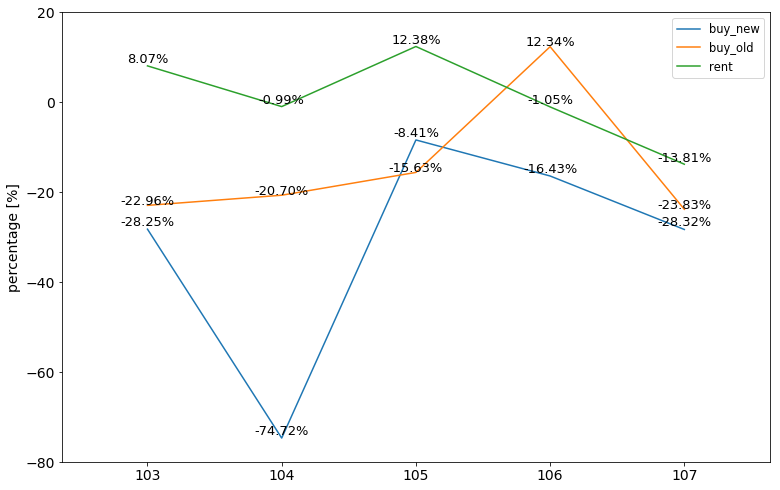

In [1016]:
fig = plt.figure(figsize=(12.7, 8.27))
ax = fig.add_subplot(111)

year = range(103,108)
ax.plot(year, year_mean_new_p, label='buy_new')
ax.plot(year,year_mean_old_p, label='buy_old')
ax.plot(year,year_rent_p, label='rent')

ax.bar(year, year_mean_new_p,  alpha=0)
ax.bar(year,year_mean_old_p, alpha=0)
ax.bar(year,year_rent_p,  alpha=0)

ax.set_ylabel("percentage [%]", fontsize=14) #設定y軸名稱
ax.tick_params(axis='both', rotation=0, labelsize=14) #設定tick
ax.set_ylim(-80,20) # 調整顯示 scale


# text
for i,p in enumerate(ax.patches):
    x=p.get_bbox().get_points()[:,0] # x 寬度
    price=p.get_bbox().get_points()[1,1] # y 高度
#     print(x,price)
    
    if i<5:
        ax.annotate('{0:.2f}%'.format(price), (x.mean(), price+0.1), 
                ha='center', va='bottom', size='13') # set the alignment of the text
    elif i<10:
        ax.annotate('{0:.2f}%'.format(price), (x.mean(), price-0.5), 
                ha='center', va='bottom', size='13') # set the alignment of the text
    else:
        ax.annotate('{0:.2f}%'.format(price), (x.mean(), price), 
                ha='center', va='bottom', size='13') # set the alignment of the text

plt.legend()

([<matplotlib.patches.Wedge at 0x7fdd5a585c18>,
 [Text(0.8424969014314915, 0.7072474609910848, 'Neihu'),
  Text(-0.2757841782492934, 1.0648676382665416, 'Beitou'),
  Text(-0.9347772396949106, 0.5798202412371992, 'Wanhua'),
  Text(-1.0948584875076233, -0.10623037386980909, 'Zhongshan'),
  Text(-0.8216228586180351, -0.7313931078403245, 'Daan'),
  Text(-0.27990221049377095, -1.0637926266715243, 'Shilin'),
  Text(0.2592720320280686, -1.0690079575980884, 'Zhongzheng'),
  Text(0.6451856665925301, -0.890918321521986, 'Wenshan'),
  Text(0.8971168749734975, -0.6365385397898436, 'Xinyi'),
  Text(1.0354293260676468, -0.37133019096095443, 'Datong'),
  Text(1.0910465783241778, -0.14006200029666774, 'Songshan'),
  Text(1.09992590354383, -0.01276740824480829, 'Nangang')],
 [Text(0.4595437644171771, 0.3857713423587735, '22.23%  (361)'),
  Text(-0.15042773359052367, 0.5808368935999317, '13.61%  (221)'),
  Text(-0.5098784943790421, 0.3162655861293813, '10.65%  (173)'),
  Text(-0.5971955386405218, -0.057

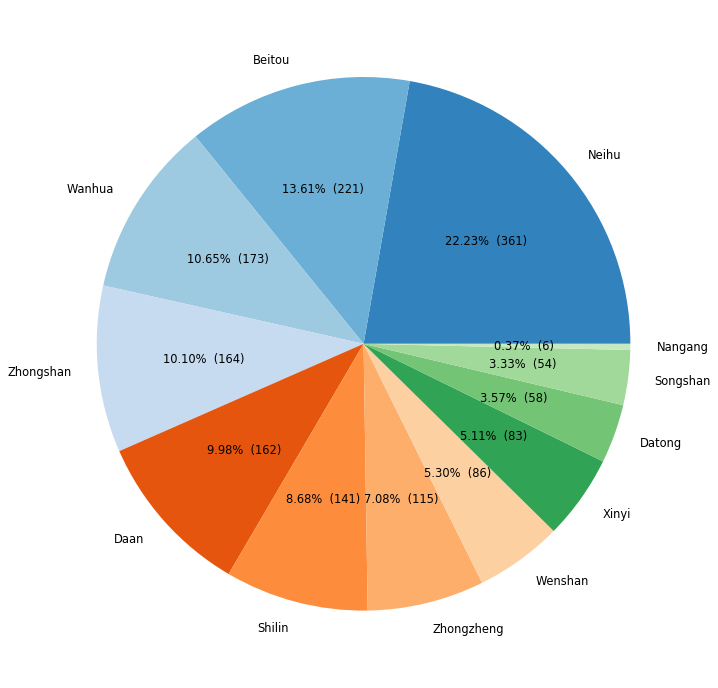

In [957]:
df = df_buy_new[df_buy_new.buy_date>=1030101]

# 租屋物件數量
df_plot = df.dist.value_counts()

fig = plt.figure(figsize=(12.7, 12.27))
# ax = fig.add_subplot(111)

# 顯示 %數 個數
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct


# 設置 pie chart color
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(len(df_plot)))

import matplotlib as mpl
mpl.rcParams['font.size'] = 11.5 # 設置 fontsize

plt.pie( df_plot.values,
    labels = df_plot.index,
    colors = outer_colors,
#     autopct='%1.1f%%', # 顯示 %
    autopct=make_autopct(df_plot.values) # 顯示 % +個數
    ) 

# Groupby

In [17]:
def groupby_price_dataframe(group):
    # mean
    df_price = group.mean()
    df_price.rename(columns={"price":"price_mean", "price_per_square":"price_per_square_mean",
                            "room_size":"room_size_mean",
#                              "house_floor":"house_floor_mean",'total_floor':'total_floor_mean'
                            }, inplace=True)
    # median
    df_price['price_median'] = group.median()['price']
    df_price['price_per_square_median'] = group.median()['price_per_square']
    df_price['room_size_median'] = group.median()['room_size']
#     df_price['house_floor_median'] = group.median()['house_floor']
#     df_price['total_floor_median'] = group.median()['total_floor']

    # mode
    group.agg(lambda x: np.mean(pd.Series.mode(x)))#.reset_index()
    df_price['price_mode'] = group.agg(lambda x: np.mean(pd.Series.mode(x)))['price']
    df_price['price_per_square_mode'] = group.agg(lambda x: np.mean(pd.Series.mode(x)))['price_per_square']
    df_price['room_size_mode'] = group.agg(lambda x: np.mean(pd.Series.mode(x)))['room_size']
#     df_price['house_floor_mode'] = group.agg(lambda x: np.mean(pd.Series.mode(x)))['house_floor']
#     df_price['total_floor_mode'] = group.agg(lambda x: np.mean(pd.Series.mode(x)))['total_floor']
    
    return df_price

In [1057]:
# -------------- setting --------------- #
groupby_method = '一層'
df = df_buy_old
df=df[df.price_per_square>50] # 防呆 一些資料錯誤
# -------------------------------------- #

In [1058]:
if groupby_method == '兩層':
    # 兩層 index
    group = df.groupby(['dist', 'room_type'])
    df_price = groupby_price_dataframe(group)
    # df_price.to_csv('multiindex_price.csv')
elif groupby_method == '一層':
    # 一層 index
    d_group = df.groupby('dist')
    df_price = groupby_price_dataframe(d_group)
    # df_price.to_csv('dict_index_price.csv')
df_price.head()

Unnamed: 0  price_per_square_mean  room_size_mean      buy_date  \
dist                                                                         
Beitou   71896.991555          139873.124949      137.425341  1.037646e+06   
Daan     68265.274962          257916.494061      122.829203  1.036851e+06   
Datong   67533.764417          163428.612761      108.696533  1.036373e+06   
Nangang  64854.563187          168372.057463      153.811161  1.034684e+06   
Neihu    66510.992381          166058.927489      151.437912  1.035028e+06   

           price_mean  parking_price  parking_square  price_median  \
dist                                                                 
Beitou   1.874260e+07  516944.533781       15.755400    13580000.0   
Daan     3.187875e+07  256474.268258        5.299391    23500000.0   
Datong   1.785361e+07  238439.021104        6.674429    13000000.0   
Nangang  2.606356e+07  752508.333333       17.794780    18500000.0   
Neihu    2.535447e+07  591643.606077       15.253361    17200000.0   

         price_per_square_median  room_size_median  price_mode  \
dist                                                             
Beitou                  135391.5            112.33    12000000   
Daan                    256739.0            105.17    20000000   
Datong                  157233.0             87.27    12000000   
Nangang                 169076.0            122.35    15000000   
Neihu                   160957.0            116.85    15000000   

         price_per_square_mode  room_size_mode  
dist                                            
Beitou                 68279.0      190.880000  
Daan                   86703.5      108.820000  
Datong                212053.0      131.056667  
Nangang               265142.0      131.350000  
Neihu                 150376.0      247.830000

# Geo

In [867]:
villages_shp = gpd.read_file("mapdata/TOWN_MOI_1080509.shp",encoding='utf-8') #全台灣村里界圖
tpe_shp = villages_shp.query('COUNTYNAME=="臺北市"') # 取出台北市
tpe_shp=tpe_shp.sort_values('TOWNENG')

In [1059]:
price_shp = gpd.GeoDataFrame(df_price)
price_shp=price_shp.sort_index()
price_shp['geometry'] = tpe_shp['geometry'].values
price_shp.head()

Unnamed: 0  price_per_square_mean  room_size_mean      buy_date  \
dist                                                                         
Beitou   71896.991555          139873.124949      137.425341  1.037646e+06   
Daan     68265.274962          257916.494061      122.829203  1.036851e+06   
Datong   67533.764417          163428.612761      108.696533  1.036373e+06   
Nangang  64854.563187          168372.057463      153.811161  1.034684e+06   
Neihu    66510.992381          166058.927489      151.437912  1.035028e+06   

           price_mean  parking_price  parking_square  price_median  \
dist                                                                 
Beitou   1.874260e+07  516944.533781       15.755400    13580000.0   
Daan     3.187875e+07  256474.268258        5.299391    23500000.0   
Datong   1.785361e+07  238439.021104        6.674429    13000000.0   
Nangang  2.606356e+07  752508.333333       17.794780    18500000.0   
Neihu    2.535447e+07  591643.606077       15.253361    17200000.0   

         price_per_square_median  room_size_median  price_mode  \
dist                                                             
Beitou                  135391.5            112.33    12000000   
Daan                    256739.0            105.17    20000000   
Datong                  157233.0             87.27    12000000   
Nangang                 169076.0            122.35    15000000   
Neihu                   160957.0            116.85    15000000   

         price_per_square_mode  room_size_mode  \
dist                                             
Beitou                 68279.0      190.880000   
Daan                   86703.5      108.820000   
Datong                212053.0      131.056667   
Nangang               265142.0      131.350000   
Neihu                 150376.0      247.830000   

                                                  geometry  
dist                                                        
Beitou   POLYGON ((121.559902986 25.21014324000004, 121...  
Daan     POLYGON ((121.543841724 25.04490669700004, 121...  
Datong   POLYGON ((121.5141047090001 25.07941577800005,...  
Nangang  POLYGON ((121.614250201 25.06451252200009, 121...  
Neihu    POLYGON ((121.5935900530001 25.11514551600004,...

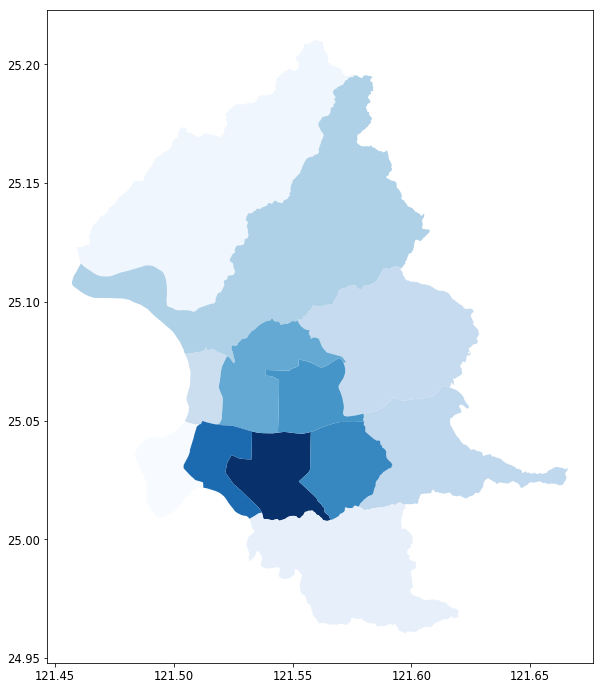

In [1036]:
price_shp.plot(
    cmap=plt.cm.Blues, #指定顏色
    column='price_per_square_mean', #指定從自身的這個 column 讀取顏色深度
    figsize=(12,12)
)
plt.show()

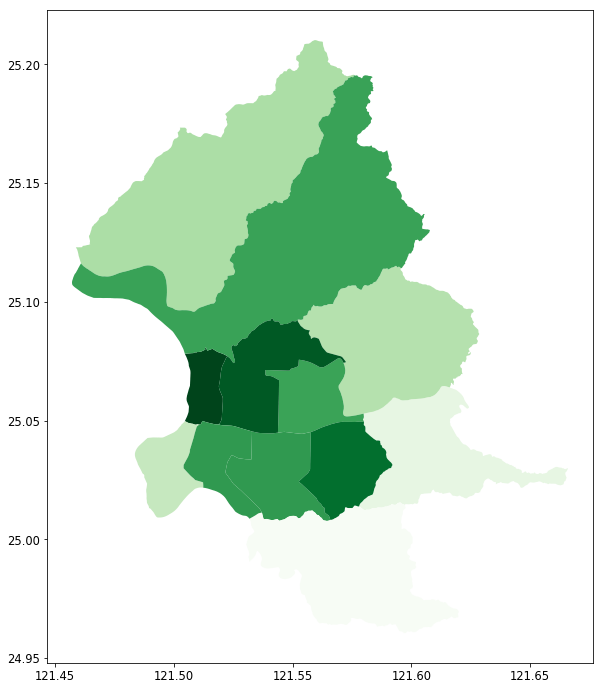

In [1021]:
price_shp.plot(
    cmap=plt.cm.Greens, #指定顏色
    column='price_per_square_median', #指定從自身的這個 column 讀取顏色深度
    figsize=(12,12)
)
plt.show()

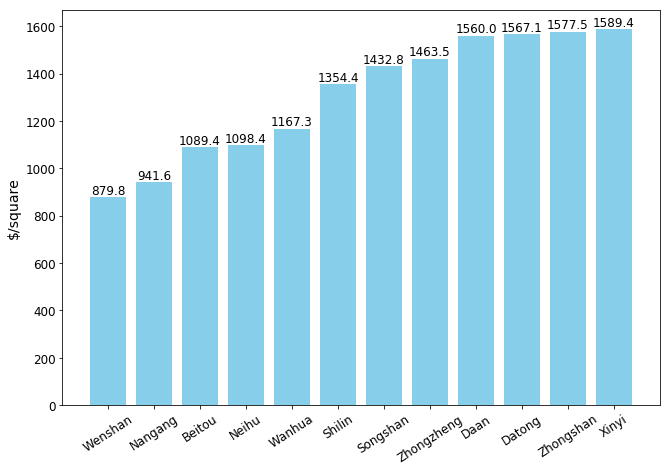

In [1053]:
# 平均數
df_plot = df_price.sort_values('price_per_square_mean') # 排序

fig = plt.figure(figsize=(10.7, 7.27))
ax = fig.add_subplot(111)

ax.set_ylabel("$/square", fontsize=14) #設定y軸名稱
# ax.set_xlabel("Distinct", fontsize=14) #設定x軸名稱
ax.tick_params(axis='x', rotation=33, labelsize=12) #設定tick
ax.tick_params(axis='y', rotation=0, labelsize=12) #設定tick

ax.bar(df_plot.index, df_plot.price_per_square_mean/0.302500011, color='skyblue')

# text
for i,p in enumerate(ax.patches):
    x=p.get_bbox().get_points()[:,0] # x 寬度
    price=p.get_bbox().get_points()[1,1] # y 高度
#     print(x,price)
    
    ax.annotate('{0:.1f}'.format(price), (x.mean(), price), 
                ha='center', va='bottom', size='12') # set the alignment of the text

plt.show()

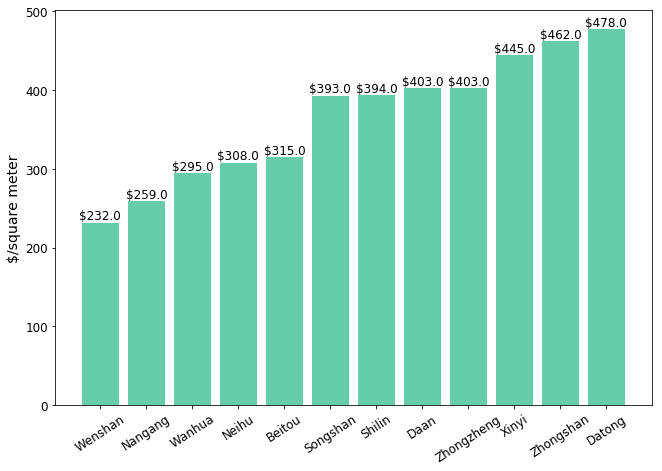

In [943]:
# 中位數
df_plot = df_price.sort_values('price_per_square_median')# 排序

fig = plt.figure(figsize=(10.7, 7.27))
ax = fig.add_subplot(111)

ax.set_ylabel("$/square meter", fontsize=14) #設定y軸名稱
# ax.set_xlabel("Distinct", fontsize=14) #設定x軸名稱
ax.tick_params(axis='x', rotation=33, labelsize=12) #設定tick
ax.tick_params(axis='y', rotation=0, labelsize=12) #設定tick

ax.bar(df_plot.index, df_plot.price_per_square_median, color='mediumaquamarine')

# text
for i,p in enumerate(ax.patches):
    x=p.get_bbox().get_points()[:,0] # x 寬度
    price=p.get_bbox().get_points()[1,1] # y 高度
#     print(x,price)
    
    ax.annotate('${0:.1f}'.format(price), (x.mean(), price), 
                ha='center', va='bottom', size='12') # set the alignment of the text

plt.show()

# 歷年變化

In [1054]:
start_year = 103

In [1055]:
Beitou, Daan, Datong, Nangang, Neihu, Shilin, Songshan = [],[],[],[],[],[],[]
Wanhua, Wenshan, Xinyi, Zhongshan, Zhongzheng = [],[],[],[],[]

for i in range(start_year, 108):
    year = str(i)
#     print(year)

    try:
        df_plot = df[(df.rent_date<=int(year+'1231'))&(df.rent_date>=int(year+'0101'))]
    except:
        df_plot = df[(df.buy_date<=int(year+'1231'))&(df.buy_date>=int(year+'0101'))]
            
    d_group = df_plot.groupby('dist')
    df_plot = groupby_price_dataframe(d_group)
    
    j = i-(start_year-1)
    for i_inner in range(len(df_plot)):

        d = (df_plot.price_per_square_mean.index[i_inner])
        p = (df_plot.price_per_square_mean.values[i_inner])/10000
#         print(d,p)

        if d == 'Beitou':
            Beitou.append(p)
        elif d == 'Daan':
            Daan.append(p)
        elif d == 'Datong':
            Datong.append(p)
        elif d == 'Nangang':
            Nangang.append(p)
        elif d == 'Neihu':
            Neihu.append(p)
        elif d == 'Shilin':
            Shilin.append(p)
        elif d == 'Songshan':
            Songshan.append(p)
        elif d == 'Wanhua':
            Wanhua.append(p)
        elif d == 'Wenshan':
            Wenshan.append(p)
        elif d == 'Xinyi':
            Xinyi.append(p)
        elif d == 'Zhongshan':
            Zhongshan.append(p)
        elif d == 'Zhongzheng':
            Zhongzheng.append(p)

    # 此年沒有的補 None
    if len(Beitou) != j:
        Beitou.append(np.nan)
    if len(Daan) != j:
        Daan.append(np.nan)
    if len(Datong) != j:
        Datong.append(np.nan)
    if len(Nangang) != j:
        Nangang.append(np.nan)
    if len(Neihu) != j:
        Neihu.append(np.nan)
    if len(Shilin) != j:
        Shilin.append(np.nan)
    if len(Songshan) != j:
        Songshan.append(np.nan)
    if len(Wanhua) != j:
        Wanhua.append(np.nan)
    if len(Wenshan) != j:
        Wenshan.append(np.nan)
    if len(Xinyi) != j:
        Xinyi.append(np.nan)
    if len(Zhongshan) != j:
        Zhongshan.append(np.nan)
    if len(Zhongzheng) != j:
        Zhongzheng.append(np.nan)

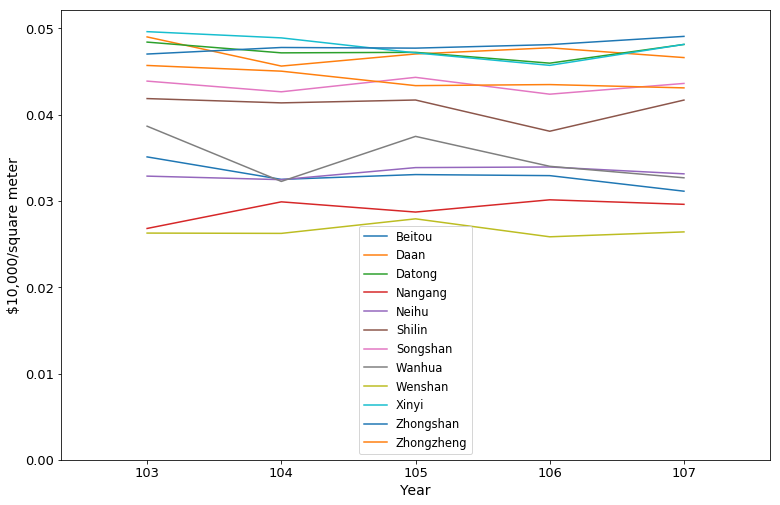

In [1056]:
# 租屋
d_str = ['Beitou','Daan','Datong','Nangang','Neihu','Shilin','Songshan',
                'Wanhua','Wenshan','Xinyi','Zhongshan','Zhongzheng']

fig = plt.figure(figsize=(12.7, 8.27))
ax = fig.add_subplot(111)

n=0
for distict in [Beitou,Daan,Datong,Nangang,Neihu,Shilin,Songshan,
                Wanhua,Wenshan,Xinyi,Zhongshan,Zhongzheng]:

    year = range(start_year,108)
    ax.plot(year, distict, label=d_str[n])
    ax.bar(year, distict, alpha=0)
    
#     ax.set_ylim(10,60) # 調整顯示 scale
    ax.set_ylabel("$10,000/square meter", fontsize=14)
    ax.set_xlabel("Year", fontsize=14)
    ax.tick_params(axis='both', rotation=0, labelsize=13)


    # -------------- percentage text -------------- #
#     last = 0
#     for i,p in enumerate(ax.patches):
#         x=p.get_bbox().get_points()[:,0] # x 寬度
#         price=p.get_bbox().get_points()[1,1] # y 高度
#         if i > 0:
#             percent = (price-last)/last*100
#         #     print(x,price, percent)

#             if not pd.isnull(percent):
#                 ax.annotate('{0:.2f}%'.format(percent), (x.mean(), price), 
#                     ha='center', va='bottom', size='12') # set the alignment of the text
#         last = price
    # -------------------------------------------- #
    n+=1
plt.legend()

In [1065]:
Beitou2, Daan2, Datong2, Nangang2, Neihu2, Shilin2, Songshan2 = [],[],[],[],[],[],[]
Wanhua2, Wenshan2, Xinyi2, Zhongshan2, Zhongzheng2 = [],[],[],[],[]

for i in range(start_year, 108):
    year = str(i)
#     print(year)

    try:
        df_plot = df[(df.rent_date<=int(year+'1231'))&(df.rent_date>=int(year+'0101'))]
    except:
        df_plot = df[(df.buy_date<=int(year+'1231'))&(df.buy_date>=int(year+'0101'))]
            
    d_group = df_plot.groupby('dist')
    df_plot = groupby_price_dataframe(d_group)
    
    j = i-(start_year-1)
    for i_inner in range(len(df_plot)):

        d = (df_plot.price_per_square_mean.index[i_inner])
        p = (df_plot.price_per_square_mean.values[i_inner])/10000
#         print(d,p)

        if d == 'Beitou':
            Beitou2.append(p)
        elif d == 'Daan':
            Daan2.append(p)
        elif d == 'Datong':
            Datong2.append(p)
        elif d == 'Nangang':
            Nangang2.append(p)
        elif d == 'Neihu':
            Neihu2.append(p)
        elif d == 'Shilin':
            Shilin2.append(p)
        elif d == 'Songshan':
            Songshan2.append(p)
        elif d == 'Wanhua':
            Wanhua2.append(p)
        elif d == 'Wenshan':
            Wenshan2.append(p)
        elif d == 'Xinyi':
            Xinyi2.append(p)
        elif d == 'Zhongshan':
            Zhongshan2.append(p)
        elif d == 'Zhongzheng':
            Zhongzheng2.append(p)

    # 此年沒有的補 None
    if len(Beitou2) != j:
        Beitou2.append(np.nan)
    if len(Daan2) != j:
        Daan2.append(np.nan)
    if len(Datong2) != j:
        Datong2.append(np.nan)
    if len(Nangang2) != j:
        Nangang2.append(np.nan)
    if len(Neihu2) != j:
        Neihu2.append(np.nan)
    if len(Shilin2) != j:
        Shilin2.append(np.nan)
    if len(Songshan2) != j:
        Songshan2.append(np.nan)
    if len(Wanhua2) != j:
        Wanhua2.append(np.nan)
    if len(Wenshan2) != j:
        Wenshan2.append(np.nan)
    if len(Xinyi2) != j:
        Xinyi2.append(np.nan)
    if len(Zhongshan2) != j:
        Zhongshan2.append(np.nan)
    if len(Zhongzheng2) != j:
        Zhongzheng2.append(np.nan)

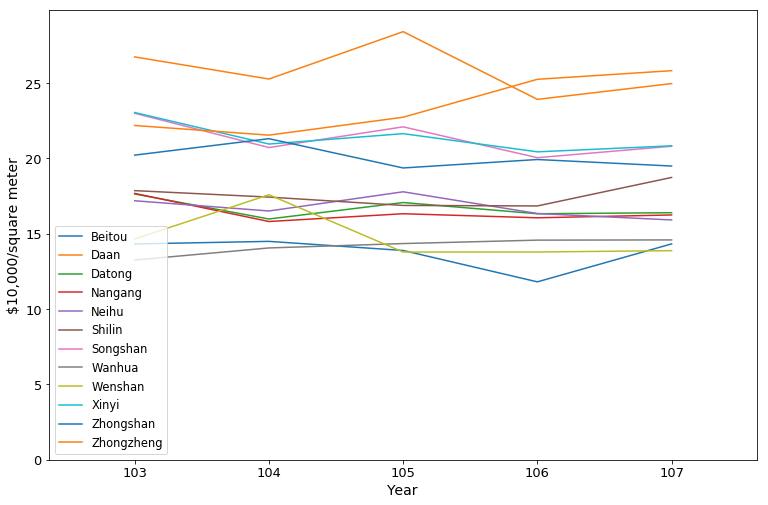

In [1066]:
# 買賣
d_str = ['Beitou','Daan','Datong','Nangang','Neihu','Shilin','Songshan',
                'Wanhua','Wenshan','Xinyi','Zhongshan','Zhongzheng']

fig = plt.figure(figsize=(12.7, 8.27))
ax = fig.add_subplot(111)

n=0
for distict in [Beitou2,Daan2,Datong2,Nangang2,Neihu2,Shilin2,Songshan2,
                Wanhua2,Wenshan2,Xinyi2,Zhongshan2,Zhongzheng2]:

    year = range(start_year,108)
    ax.plot(year, distict, label=d_str[n])
    ax.bar(year, distict, alpha=0)
    
#     ax.set_ylim(10,65) # 調整顯示 scale
    ax.set_ylabel("$10,000/square meter", fontsize=14)
    ax.set_xlabel("Year", fontsize=14)
    ax.tick_params(axis='both', rotation=0, labelsize=13)


    # -------------- percentage text -------------- #
#     last = 0
#     for i,p in enumerate(ax.patches):
#         x=p.get_bbox().get_points()[:,0] # x 寬度
#         price=p.get_bbox().get_points()[1,1] # y 高度
#         if i > 0:
#             percent = (price-last)/last*100
#         #     print(x,price, percent)

#             if not pd.isnull(percent):
#                 ax.annotate('{0:.2f}%'.format(percent), (x.mean(), price), 
#                     ha='center', va='bottom', size='12') # set the alignment of the text
#         last = price
    # -------------------------------------------- #
    n+=1
plt.legend()

# 租金/房價%

In [1079]:
rent_buy_p_B = []
for i,v in enumerate(Beitou):
    buy = Beitou2[i]
    rent_buy_p_B.append(v*12/buy*100)
    
rent_buy_p_X = []
for i,v in enumerate(Xinyi):
    buy = Xinyi2[i]
    rent_buy_p_X.append(v*12/buy*100)
    
rent_buy_p_N = []
for i,v in enumerate(Neihu):
    buy = Neihu2[i]
    rent_buy_p_N.append(v*12/buy*100)
    
rent_buy_p_W = []
for i,v in enumerate(Wanhua):
    buy = Wanhua2[i]
    rent_buy_p_W.append(v*12/buy*100)
    
rent_buy_p_We = []
for i,v in enumerate(Wenshan):
    buy = Wenshan2[i]
    rent_buy_p_We.append(v*12/buy*100)
    
rent_buy_p_D = []
for i,v in enumerate(Datong):
    buy = Datong2[i]
    rent_buy_p_D.append(v*12/buy*100)
    
rent_buy_p_DA = []
for i,v in enumerate(Daan):
    buy = Daan2[i]
    rent_buy_p_DA.append(v*12/buy*100)
    
rent_buy_p_NG = []
for i,v in enumerate(Nangang):
    buy = Nangang2[i]
    rent_buy_p_NG.append(v*12/buy*100)
    
rent_buy_p_SL = []
for i,v in enumerate(Shilin):
    buy = Shilin2[i]
    rent_buy_p_SL.append(v*12/buy*100)
    
rent_buy_p_SS = []
for i,v in enumerate(Songshan):
    buy = Songshan2[i]
    rent_buy_p_SS.append(v*12/buy*100)
    
rent_buy_p_ZS = []
for i,v in enumerate(Zhongshan):
    buy = Zhongshan2[i]
    rent_buy_p_ZS.append(v*12/buy*100)
    
rent_buy_p_Zz = []
for i,v in enumerate(Zhongzheng):
    buy = Zhongzheng2[i]
    rent_buy_p_Zz.append(v*12/buy*100)

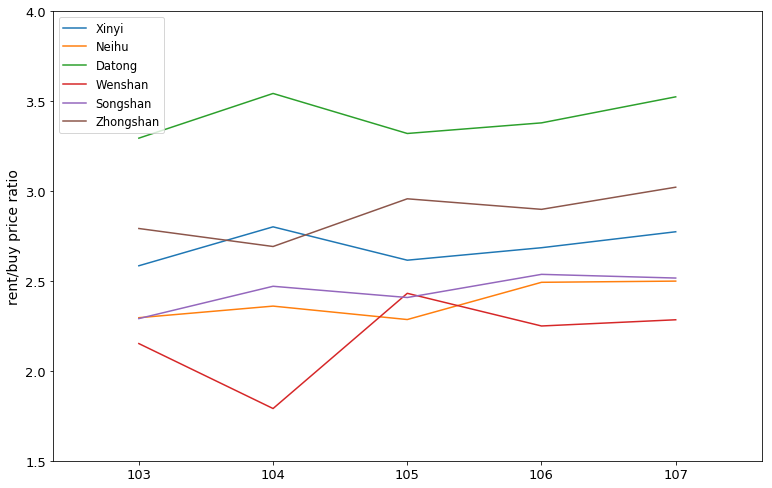

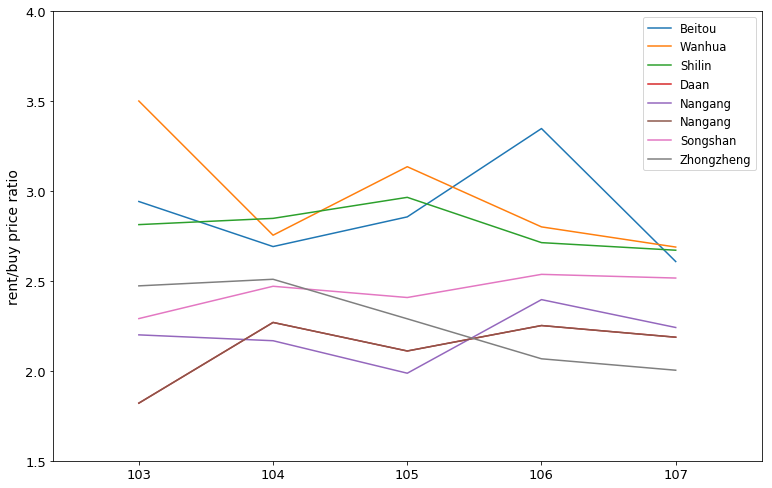

In [1094]:
d_str = ['Xinyi','Neihu','Datong','Wenshan',
         'Songshan','Zhongshan']

fig = plt.figure(figsize=(12.7, 8.27))
ax = fig.add_subplot(111)

n=0
for distict in [rent_buy_p_X,rent_buy_p_N,rent_buy_p_D,rent_buy_p_We,
        rent_buy_p_SS,rent_buy_p_ZS]:

    year = range(start_year,108)
    ax.plot(year, distict, label=d_str[n])
    ax.bar(year, distict, alpha=0)
    
    ax.set_ylim(1.5,4) # 調整顯示 scale
    ax.set_ylabel("rent/buy price ratio", fontsize=14)
#     ax.set_xlabel("Year", fontsize=14)
    ax.tick_params(axis='both', rotation=0, labelsize=13)
    
    n+=1
    plt.legend()
    
# --------- 跌 ---------- #

d_str = ['Beitou','Wanhua','Shilin','Daan','Nangang',
         'Nangang','Songshan','Zhongzheng']

fig = plt.figure(figsize=(12.7, 8.27))
ax = fig.add_subplot(111)
n=0
for distict in [rent_buy_p_B,rent_buy_p_W,rent_buy_p_SL,rent_buy_p_NG,
        rent_buy_p_DA,rent_buy_p_NG,rent_buy_p_SS,rent_buy_p_Zz]:

    year = range(start_year,108)
    ax.plot(year, distict, label=d_str[n])
    ax.bar(year, distict, alpha=0)
    
    ax.set_ylim(1.5,4) # 調整顯示 scale
    ax.set_ylabel("rent/buy price ratio", fontsize=14)
#     ax.set_xlabel("Year", fontsize=14)
    ax.tick_params(axis='both', rotation=0, labelsize=13)
    
    n+=1
    plt.legend()

## 各區平均租金/賣價比

In [1099]:
df_rent_buy_rate = pd.DataFrame()
df_rent_buy_rate['dist']=['Beitou','Xinyi','Neihu','Wanhua','Wenshan','Datong','Daan',
'Nangang','Shilin','Songshan','Zhongshan','Zhongzheng']
df_rent_buy_rate['rate']=[np.mean(rent_buy_p_B),np.mean(rent_buy_p_X),np.mean(rent_buy_p_N),np.mean(rent_buy_p_W),np.mean(rent_buy_p_We),np.mean(rent_buy_p_D),
np.mean(rent_buy_p_DA),np.mean(rent_buy_p_NG),np.mean(rent_buy_p_SL),np.mean(rent_buy_p_SS),np.mean(rent_buy_p_ZS),np.mean(rent_buy_p_Zz)]
df_rent_buy_rate.head()

dist      rate
0       Beitou  2.889106
1        Xinyi  2.691987
2        Neihu  2.386680
3       Wanhua  2.976064
4      Wenshan  2.181579
5       Datong  3.412108
6         Daan  2.198551
7      Nangang  2.128040
8       Shilin  2.802198
9     Songshan  2.444517
10   Zhongshan  2.872072
11  Zhongzheng  2.268576

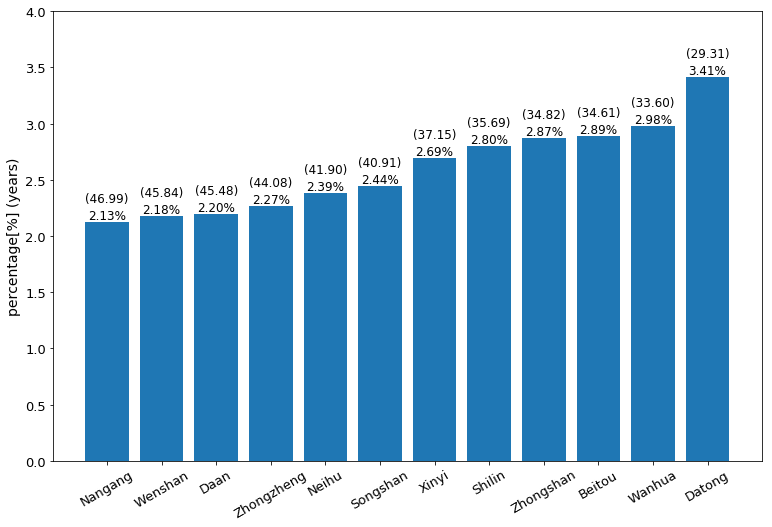

In [1122]:
fig = plt.figure(figsize=(12.7, 8.27))
ax = fig.add_subplot(111)

df_rent_buy_rate.sort_values('rate', inplace=True)
ax.bar(df_rent_buy_rate.dist, df_rent_buy_rate.rate)

ax.set_ylim(0,4)
ax.set_ylabel("percentage[%] (years)", fontsize=14)
ax.tick_params(axis='x', rotation=30, labelsize=13)
ax.tick_params(axis='y', rotation=0, labelsize=13)

for i,p in enumerate(ax.patches):
    x=p.get_bbox().get_points()[:,0] # x 寬度
    rate=p.get_bbox().get_points()[1,1] # y 高度
#     print(x,rate)
    
    # 回本年限
    ax.annotate('({0:.2f})'.format(100/rate), (x.mean(), rate+0.15), 
        ha='center', va='bottom', size='12') # set the alignment of the text
    
    # 回本年限
    ax.annotate('{0:.2f}%'.format(rate), (x.mean(), rate), 
        ha='center', va='bottom', size='12') # set the alignment of the text

In [857]:
# label_s = ['Beitou','Neihu','Wanhua','Wenshan','Xinyi', 'Datong']
# # label_s = ['Daan','Nangang','Shilin','Songshan','Zhongshan','Zhongzheng']


# fig = plt.figure(figsize=(12.7, 8.27))
# ax = fig.add_subplot(111)

# n=0
# for distict in [Beitou,Neihu,Wanhua,Wenshan,Xinyi, Datong]: # 房價低
# # for distict in [Daan,Nangang,Shilin,Songshan,Zhongshan,Zhongzheng]: # 房價高

#     year = range(start_year,108)
#     ax.plot(year, distict, label=label_s[n])
#     ax.bar(year, distict, alpha=0)
    
#     ax.set_ylim(10,35) # 調整顯示 scale
#     ax.set_ylabel("$10,000/square meter", fontsize=14)
#     ax.set_xlabel("Year", fontsize=14)
#     ax.tick_params(axis='both', rotation=0, labelsize=13)


#     # -------------- percentage text -------------- #
# #     last = 0
# #     for i,p in enumerate(ax.patches):
# #         x=p.get_bbox().get_points()[:,0] # x 寬度
# #         price=p.get_bbox().get_points()[1,1] # y 高度
# #         if i > 0:
# #             percent = (price-last)/last*100
# #         #     print(x,price, percent)

# #             if not pd.isnull(percent):
# #                 ax.annotate('{0:.2f}%'.format(percent), (x.mean(), price), 
# #                     ha='center', va='bottom', size='12') # set the alignment of the text
# #         last = price
#     # -------------------------------------------- #
#     n+=1
# plt.legend()

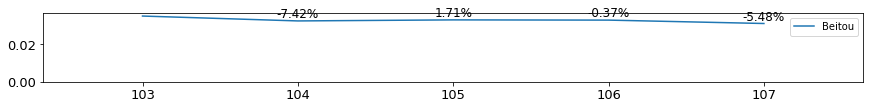

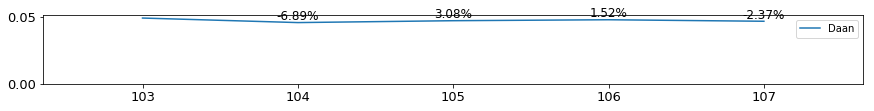

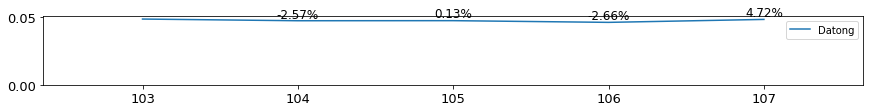

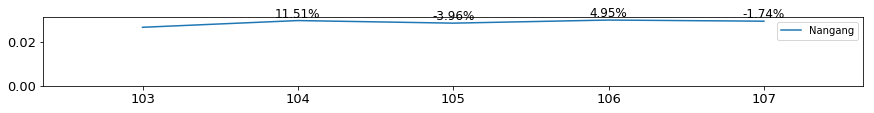

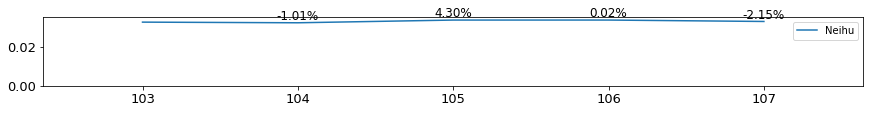

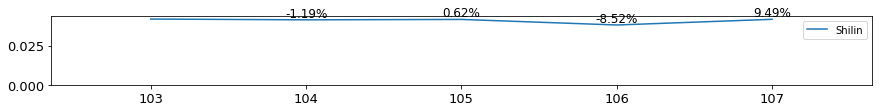

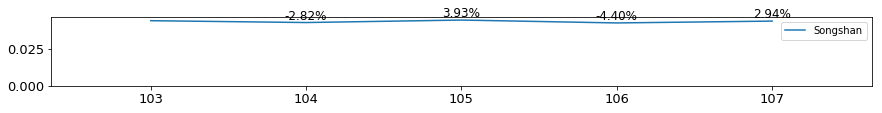

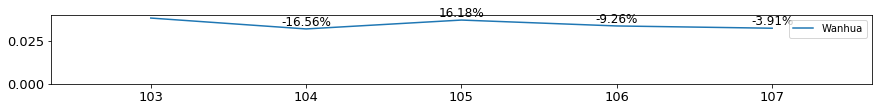

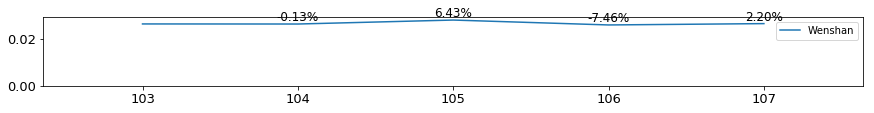

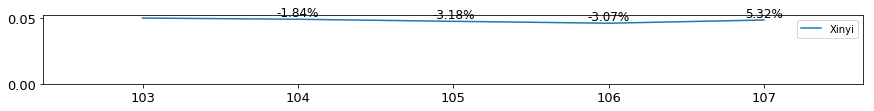

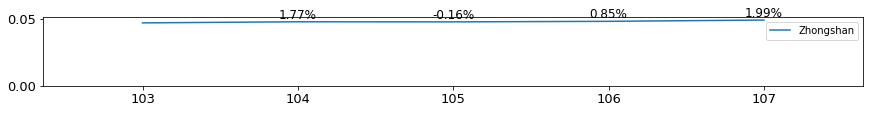

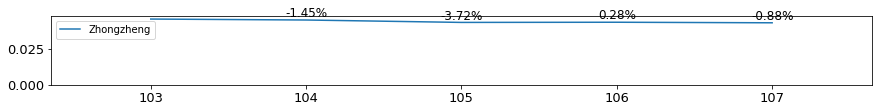

In [858]:
percent_large_list, percent_min_list, percent_mean_list = [],[],[]

n=0
for distict in [Beitou,Daan,Datong,Nangang,Neihu,Shilin,Songshan,
                Wanhua,Wenshan,Xinyi,Zhongshan,Zhongzheng]:

    fig = plt.figure(figsize=(14.7, 1.27))
    ax = fig.add_subplot(111)

    year = range(start_year,108)
    ax.plot(year, distict, label=d_str[n])
    ax.bar(year, distict, alpha=0)
#     ax.set_ylim(10,65) # 調整顯示 scale
#     ax.set_ylabel("$10,000/square meter", fontsize=13)
#     ax.set_xlabel("Year", fontsize=14)
    ax.tick_params(axis='both', rotation=0, labelsize=13)
    
    last = 0
    percent_list=[]
    for i,p in enumerate(ax.patches):
        x=p.get_bbox().get_points()[:,0] # x 寬度
        price=p.get_bbox().get_points()[1,1] # y 高度
        
        if i > 0:
            percent = (price-last)/last*100
            percent_list.append(percent)
            
        #     print(x,price, percent)

            if not pd.isnull(percent):
                ax.annotate('{0:.2f}%'.format(percent), (x.mean(), price), 
                    ha='center', va='bottom', size='12') # set the alignment of the text
        last = price
    
    try:
        percent_large_list.append(max([x for x in percent_list if not pd.isnull(x)]))
        percent_min_list.append(min([x for x in percent_list if not pd.isnull(x)]))
        percent_mean_list.append(np.mean([x for x in percent_list if not pd.isnull(x)]))
    except:
        print(d_str[n])
        percent_large_list.append(np.nan)
        percent_min_list.append(np.nan)
        percent_mean_list.append(np.nan)
    
    n+=1
    plt.legend()

In [859]:
# 各區最大漲跌幅
price_shp['percentag_max'] = percent_large_list
price_shp['percentag_min'] = percent_min_list
price_shp['percentag_mean'] = percent_mean_list
percent_mean_list

[-2.8892740169603033,
 -1.1682183568752644,
 -0.09568884912127862,
 2.6884279109414146,
 0.2891969804928701,
 0.1010680524401959,
 -0.08917478987380079,
 -3.385316405611275,
 0.25961806739334314,
 -0.691718107208444,
 1.113144736859689,
 -1.44226336172573]

In [860]:
# price_shp.plot(
#     cmap=plt.cm.Purples, #指定顏色
#     column='percentag_large', #指定從自身的這個 column 讀取顏色深度
#     figsize=(12,12)
# )
# plt.show()

[-0.4  0.4] 2.6884279109414146
[0.6 1.4] 1.113144736859689
[1.6 2.4] 0.2891969804928701
[2.6 3.4] 0.25961806739334314
[3.6 4.4] 0.1010680524401959
[4.6 5.4] -0.08917478987380079
[5.6 6.4] -0.09568884912127862
[6.6 7.4] -0.691718107208444
[7.6 8.4] -1.1682183568752644
[8.6 9.4] -1.44226336172573
[ 9.6 10.4] -2.8892740169603033
[10.6 11.4] -3.385316405611275


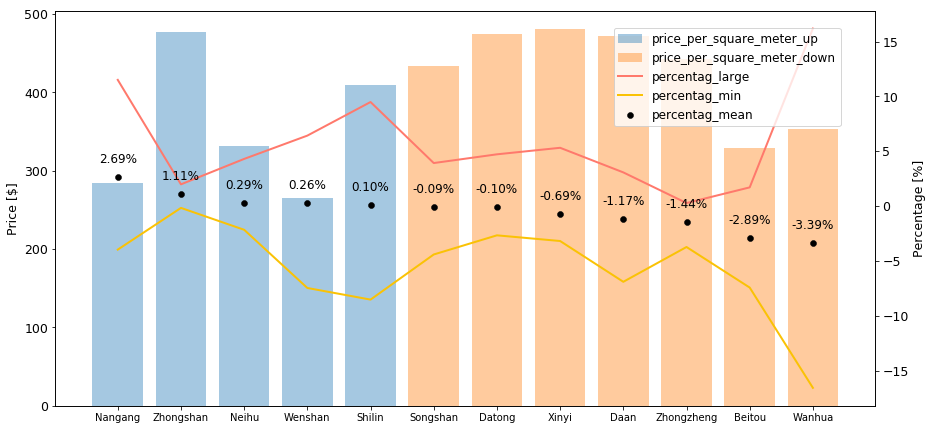

In [864]:
fig = plt.figure(figsize=(14.7, 7.27))
ax = fig.add_subplot(111)

price_plot = price_shp.sort_values('percentag_mean', ascending=False)
price_plot_up = price_plot[price_plot.percentag_mean>0]
price_plot_down = price_plot[price_plot.percentag_mean<=0]

year = range(start_year,10)
ax.bar(price_plot_up.index, price_plot_up['price_per_square_mean']/10000, alpha=0.4, label='price_per_square_meter_up')
ax.bar(price_plot_down.index, price_plot_down['price_per_square_mean']/10000, alpha=0.4, label='price_per_square_meter_down')
# plt.legend()

ax2=ax.twinx()
ax2.plot(price_plot['percentag_large'], color= "xkcd:salmon", linewidth=2)
ax2.plot(price_plot['percentag_min'], color= "xkcd:goldenrod", linewidth=2)
ax2.scatter(price_plot.index, price_plot['percentag_mean'], color= "xkcd:black", linewidth=0.5)
ax2.bar(price_plot.index, price_plot['percentag_mean'], alpha=0)


for i,p in enumerate(ax2.patches):
    x=p.get_bbox().get_points()[:,0] # x 寬度
    percent=p.get_bbox().get_points()[1,1] # y 高度
#     print(x,percent)
    
    if not pd.isnull(percent):
        ax2.annotate('{0:.2f}%'.format(percent), (x.mean(), percent+1), 
                ha='center', va='bottom', size='12') # set the alignment of the text
    last = price

ax.set_ylabel('Price [10,000]', size=12.5)
ax2.set_ylabel('Percentage [%]', size=12.5)

ax.tick_params(axis='y', rotation=0, labelsize=12.5)
ax2.tick_params(axis='both', rotation=0, labelsize=12.5)

fig.legend(bbox_to_anchor=(0.8,0.78),prop={'size': 12})  

In [862]:
# plt.plot(year,Datong, label='Datong')
# plt.plot(year,Nangang, label='Nangang')
# plt.plot(year,Neihu, label='Neihu')
# plt.plot(year,Shilin, label='Shilin')
# plt.plot(year,Songshan, label='Songshan')
# plt.plot(year,Wanhua, label='Wanhua')
# plt.plot(year,Wenshan, label='Wenshan')
# plt.plot(year,Xinyi, label='Xinyi')
# plt.plot(year,Zhongshan, label='Zhongshan')
# plt.plot(year,Zhongzheng, label='Zhongzheng')